![banner](https://anopheles-genomic-surveillance.github.io/_images/banner.jpg)

***Training course in data analysis for genomic surveillance of African malaria vectors***

**[Workshop 7](about) - Gene flow and the spread of insecticide resistance**

---


# Module 1 - Organophosphate resistance markers (combining SNP and CNV data)

**Theme: Analysis**

The acetylcholinesterase enzyme produced by the **_Ace1_** gene is the target for organophosphate insecticides. Both target-site mutations and gene copy number amplifications have been implicated in insecticide resistance phenotypes. 

Overexpression of the **_Gste2_** gene has also been associated with resistance to some organophosphates, and SNPs in the same gene have been linked to pyrethroid and DDT resistance phenotypes.

In this module we're going to investigate known organophosphate insecticide resistance markers, learning how to combine SNPs and CNVs, using data from Ag3.0. 


## Learning Objectives
- Understand mechanisms and markers of organophosphate resistance.
- Revisit amino acid frequency and CNV gene frequency analyses.
- Learn how to combine and interpret SNP and CNV frequency data.

## Lecture

### English

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/gl3qriDdMvo" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Français

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/0YQ14RCxmAE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Please note that the code in the cells below might differ from that shown in the video. This can happen because Python packages and their dependencies change due to updates, necessitating tweaks to the code.

## Setup

First, let’s begin by installing and importing some Python packages, and configuring access to Anopheles genomic data from the MalariaGEN Ag3.0 data resource.

In [3]:
%pip install -q --no-warn-conflicts malariagen_data

In [4]:
import malariagen_data

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import plotly.io as pio
pio.renderers.default = "notebook+colab"

Note that authentication is required to access data through the package, please follow the instructions [here](https://malariagen.github.io/vector-data/vobs/vobs-data-access.html).

In [6]:
ag3 = malariagen_data.Ag3()
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release_master_us_central1
Data releases available : 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 3.10, 3.11, 3.12, 3.13, 3.14
Results cache           : None
Cohorts analysis        : 20250502
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 15.2.0
Client location         : Iowa, United States (Google Cloud us-central1)
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact support@malariagen.net. For API documentation see 
https://malariagen.github.io/malariagen-data-python/v15.2.0/Ag3.html

## Introduction

### The _Ace1_ gene

**Acetylcholinesterase**, also known as **AChE**, is an essential carboxylesterase enzyme in the nervous system of animals. AChE breaks down the neurotransmitter acetylcholine.

In anophelines, the AChE protein is produced by the **_Ace1_** gene.

In the diagram below we see the neurotransmitter acetylcholine (ACh) being released from the pre-synaptic membrane of one neuron in the nervous system, and binding to receptors on the post-synaptic membrane of another neuron. This enables a nerve impulse to travel between the neurons. AChE (the red "Pac Man") breaks ACh down into acetate and choline, terminating the nerve impulse.



<img src="https://github.com/anopheles-genomic-surveillance/anopheles-genomic-surveillance.github.io/blob/master/src/img/workshop-7/w7m1-1.jpg?raw=1" />

Figure reference: Muramatsu I, Masuoka T, Uwada J, et al. A New Aspect of Cholinergic Transmission in the Central Nervous System. 2018 Apr 4. In: Akaike A, Shimohama S, Misu Y, editors. Nicotinic Acetylcholine Receptor Signaling in Neuroprotection [Internet]. Singapore: Springer; 2018. http://creativecommons.org/licenses/by/4.0/

### Resistance to arganophosphate and carbamate insecticides

**Organophosphate** (**OP**) and **carbamate** insecticides block the action of AChE via competitive binding. This results in nerve impulses not being terminated, and leads to insect death.

Non-synonymous "target-site" mutations in _Ace1_ can confer resistance to both carbamate and OP insecticides by reducing how well they bind to AChE. However, these mutations make AChE less effective in the absence of insecticides. Due to the important role that AChE plays in the nervous system, these resistant phenotypes come with a high fitness cost.

Amplifications of the _Ace1_ gene have also been found to be associated with carbamate and OP resistance. It is thought that these amplifications, detectable using CNV analyses, may increase resistance phenotype by enabling more copies of the mutant gene to be present while **restoring mosquito fitness in the absence of insecticides by allowing a un-mutated (wild-type) copy of the gene to remain**.

**Pirimiphos methyl** (**PM**) is an OP insecticide used for indoor residual spraying (IRS). With the increase of pyrethroid and carbamate resistance, WHO has recommend PM for IRS since 2013. **PM is the active ingredient in the IRS product Actellic CS, and is now being widely used, hence the importance of tracking known OP resistance markers.**

## *Ace1* amino acid substitution frequencies

Xavier Grau-Bové and colleagues demonstrated that, in _Anopheles gambiae_ and _colluzii_ from West Africa, the **G280S** amino acid altering SNP in the *Ace1* gene was associated with resistance to the OP pirimiphos methyl ([Grau-Bové et al. 2021](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1009253)).

Let's examine _Ace1_ amino acid allele frequencies in _An. coluzzi_ (West & Central Africa) from the Ag3.0 data release using the `ag3.aa_allele_frequencies()` function.

In brief, this analysis will take each amino acid in the _Ace1_ gene in turn, and calculate the frequency of alternative (non-reference) residues in each of our chosen mosquito cohorts.

For example, if we take the figure below and consider the locus of interest to be an amino acid in the _Ace1_ gene, we see that from our cohort of five individuals (ten haplotypes), there are four instances of an alternative amino acid. This means the allele frequency of the alternative amino acid here is 0.4.



<img src="https://github.com/anopheles-genomic-surveillance/anopheles-genomic-surveillance.github.io/blob/master/src/img/workshop-7/w7m1-2.png?raw=1" />

A deep dive into the `aa_allele_frequencies()` function and allele frequencies in general can be found in [workshop 1 - module 4](https://anopheles-genomic-surveillance.github.io/workshop-1/module-4-vgsc-snps.html), where we used it to investigate SNP and amino acid substitution frequencies in the _Vgsc_ gene (the target of pyrethroid and DDT insecticides).

Using `?` we can remind ourselves what parameters we need for this function.

In [7]:
ag3.aa_allele_frequencies?

Signature:
ag3.aa_allele_frequencies(
    transcript: str,
    cohorts: Union[str, Mapping[str, str]],
    sample_query: Optional[str] = None,
    sample_query_options: Optional[dict] = None,
    min_cohort_size: Optional[int] = 10,
    site_mask: Optional[str] = None,
    sample_sets: Union[str, Sequence[str], NoneType] = None,
    drop_invariant: bool = True,
    include_counts: bool = False,
    chunks: Union[int, str, Tuple[Union[int, str], ...], Callable[[Tuple[int, ...]], Union[int, str, Tuple[Union[int, str], ...]]]] = 'native',
    inline_array: bool = True,
) -> pandas.core.frame.DataFrame
Docstring:
Compute amino acid substitution frequencies for a gene transcript.

Parameters
----------
transcript : str
    Gene transcript identifier.
cohorts : str or Mapping[str, str]
    Either a string giving the name of a predefined cohort set (e.g.,
    "admin1_month") or a dict mapping custom cohort labels to sample
    queries.
sample_query : str or None, optional
    A pandas query s

In [8]:
ace1_aa_freqs_df = ag3.aa_allele_frequencies(
    transcript="AGAP001356-RA", 
    sample_sets = '3.0',
    cohorts="admin1_year",
    sample_query='taxon == "coluzzii"'
)

ace1_aa_freqs_df

Load SNP genotypes:   0%|          | 0/129 [00:00<?, ?it/s]

Compute allele frequencies:   0%|          | 0/16 [00:00<?, ?it/s]

Compute SNP effects:   0%|          | 0/6098 [00:00<?, ?it/s]

,,,frq_AO-LUA_colu_2009,frq_BF-09_colu_2012,frq_BF-09_colu_2014,frq_CF-BGF_colu_1994,frq_CI-LG_colu_2012,frq_CM-CE_colu_2013,frq_GH-AA_colu_2012,frq_GH-CP_colu_2012,frq_GH-WP_colu_2012,frq_GM-L_colu_2006,...,transcript,aa_pos,ref_allele,ref_aa,alt_aa,effect,impact,alt_allele,max_af,label
aa_change,contig,position,,,,,,,,,,,,,,,,,,,,,
R4G,2R,3489222,0.000000,0.006098,0.000000,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,...,AGAP001356-RA,4.0,C,R,G,NON_SYNONYMOUS_CODING,MODERATE,G,0.006098,"R4G (2R:3,489,222 C>G)"
P19T,2R,3489267,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,...,AGAP001356-RA,19.0,C,P,T,NON_SYNONYMOUS_CODING,MODERATE,A,0.018519,"P19T (2R:3,489,267 C>A)"
G24C,2R,3489282,0.006173,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,...,AGAP001356-RA,24.0,G,G,C,NON_SYNONYMOUS_CODING,MODERATE,T,0.006173,"G24C (2R:3,489,282 G>T)"
G24S,2R,3489282,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,...,AGAP001356-RA,24.0,G,G,S,NON_SYNONYMOUS_CODING,MODERATE,A,0.018519,"G24S (2R:3,489,282 G>A)"
V25L,2R,3489285,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,...,AGAP001356-RA,25.0,G,V,L,NON_SYNONYMOUS_CODING,MODERATE,T,0.020000,"V25L (2R:3,489,285 G>T)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V726M,2R,3493750,0.000000,0.000000,0.009434,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,...,AGAP001356-RA,726.0,G,V,M,NON_SYNONYMOUS_CODING,MODERATE,A,0.009434,"V726M (2R:3,493,750 G>A)"
A731T,2R,3493765,0.000000,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.00,0.0,0.0,...,AGAP001356-RA,731.0,G,A,T,NON_SYNONYMOUS_CODING,MODERATE,A,0.002907,"A731T (2R:3,493,765 G>A)"
A731V,2R,3493766,0.000000,0.012195,0.009434,0.0,0.0125,0.0,0.000000,0.00,0.0,0.0,...,AGAP001356-RA,731.0,C,A,V,NON_SYNONYMOUS_CODING,MODERATE,T,0.012500,"A731V (2R:3,493,766 C>T)"


We get 159 amino acid changes from our _coluzzii_ cohorts, but many are at low frequencies. Let’s filter our DataFrame using `query` to just alternative amino acid frequencies greater than, or equal to 5%.

In [9]:
ace1_aa_filt_df = ace1_aa_freqs_df.query("max_af >= 0.05")
ace1_aa_filt_df

,,,frq_AO-LUA_colu_2009,frq_BF-09_colu_2012,frq_BF-09_colu_2014,frq_CF-BGF_colu_1994,frq_CI-LG_colu_2012,frq_CM-CE_colu_2013,frq_GH-AA_colu_2012,frq_GH-CP_colu_2012,frq_GH-WP_colu_2012,frq_GM-L_colu_2006,...,transcript,aa_pos,ref_allele,ref_aa,alt_aa,effect,impact,alt_allele,max_af,label
aa_change,contig,position,,,,,,,,,,,,,,,,,,,,,
F35S,2R,3489316,1.000000,0.975610,1.000000,1.000000,0.99375,1.000000,1.000000,1.00,1.000000,0.973684,...,AGAP001356-RA,35.0,T,F,S,NON_SYNONYMOUS_CODING,MODERATE,C,1.000000,"F35S (2R:3,489,316 T>C)"
G61D,2R,3489394,0.061728,0.000000,0.000000,0.000000,0.00000,0.041667,0.000000,0.00,0.000000,0.000000,...,AGAP001356-RA,61.0,G,G,D,NON_SYNONYMOUS_CODING,MODERATE,A,0.061728,"G61D (2R:3,489,394 G>A)"
A65S,2R,3489405,1.000000,0.597561,0.660377,0.923077,0.70000,0.791667,0.678571,0.66,0.729167,0.315789,...,AGAP001356-RA,65.0,G,A,S,NON_SYNONYMOUS_CODING,MODERATE,T,1.000000,"A65S (2R:3,489,405 G>T)"
R106H,2R,3489529,0.000000,0.000000,0.000000,0.000000,0.00000,0.208333,0.000000,0.00,0.000000,0.000000,...,AGAP001356-RA,106.0,G,R,H,NON_SYNONYMOUS_CODING,MODERATE,A,0.208333,"R106H (2R:3,489,529 G>A)"
V218L,2R,3491888,0.000000,0.018293,0.028302,0.000000,0.00000,0.000000,0.035714,0.02,0.000000,0.000000,...,AGAP001356-RA,218.0,G,V,L,NON_SYNONYMOUS_CODING,MODERATE,T,0.060000,"V218L (2R:3,491,888 G>T)"
G280S,2R,3492074,0.000000,0.024390,0.018868,0.000000,0.43750,0.000000,0.285714,0.00,0.000000,0.000000,...,AGAP001356-RA,280.0,G,G,S,NON_SYNONYMOUS_CODING,MODERATE,A,0.437500,"G280S (2R:3,492,074 G>A)"
S338R,2R,3492329,0.000000,0.024390,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.020833,0.000000,...,AGAP001356-RA,338.0,C,S,R,NON_SYNONYMOUS_CODING,MODERATE,A,0.055556,"S338R (2R:3,492,329 C>A)"
S367A,2R,3492414,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,...,AGAP001356-RA,367.0,T,S,A,NON_SYNONYMOUS_CODING,MODERATE,G,0.050000,"S367A (2R:3,492,414 T>G)"
D624E,2R,3493273,0.000000,0.000000,0.000000,0.115385,0.01250,0.000000,0.035714,0.00,0.020833,0.000000,...,AGAP001356-RA,624.0,C,D,E,NON_SYNONYMOUS_CODING,MODERATE,A,0.115385,"D624E (2R:3,493,273 C>A)"


Now we have just 11 amino acid substitutions of interest, including the G280S mutation implicated in organophosphate insecticide resistance.

Let's display the pandas DataFrame as a heatmap for ease of visualisation.

In [10]:
ag3.plot_frequencies_heatmap(ace1_aa_filt_df, height=600, width=1000)

There are few high frequency amino acid substitutions in _Ace1_, as we might expect for a functionally constrained gene. However, we can see appreciable frequencies of the known organophosphate resistance marker G280S in cohorts from Cote d'Ivoire (CI-LG_colu_2012) and Ghana (GH-AA_colu_2012). There are also high frequencies of F35S and A65S mutations across all the cohorts. In the case of F35S, this may well be an artifact, driven by the mutant allele actually being in the reference genome so the wild-type (S) appears as the high frequency alternative allele. The A65F mutation is present in all populations at varying frequencies, but we can see that it is found at high frequency in the Central African Republic cohort collected in 1994, prior to OP use in malaria control.

## *Ace1* copy number variation frequencies

Increases in copy number of the _Ace1_ gene have been linked with insecticide resistance in association with the G280S amino acid subsitution in both [_Anopheles_](https://onlinelibrary.wiley.com/doi/full/10.1111/mec.13197#mec13197-bib-0018) and [_Culex_](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.0030205) mosquitoes.

In _Culex_, the 280S mutation has been shown to cause over 60% reduction in esterase enzymatic activity in the absence of insecticide, causing developmental and behavioural issues. It is likely that the same mutation causes similar issues in _Anopheles_.

As we can see in the figure below, a permanent "heterozygote" can be created by pairing a wild type 280G carrying _Ace1_ gene with at least one OP resistance mutation 280S carrying _Ace1_ gene, on the same haplotype.

<img src="https://github.com/anopheles-genomic-surveillance/anopheles-genomic-surveillance.github.io/blob/master/src/img/workshop-7/w7m1-3.png?raw=1" />

This haplotypic heterozygote compensates for the neurophysiological fitness cost of 280S in the absence of insecticide. Plus there can be a number of copies of the resistant gene and carrying multiple copies has been strongly associated with increased carbamate resistance in bioassays ([Edi et al. 2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3437712/)). 

Let's use the CNV data to look into copy number of the the _Ace1_ gene in _An. coluzzii_ from the Ag3.0 data set. We can use the `ag3.plot_cnv_hmm_heatmap()` function (explored in detail in [workshop 2 - module 3](https://anopheles-genomic-surveillance.github.io/workshop-2/module-3-cnv-calling.html) to visualise copy number around _Ace1_.

Briefly, this function builds a heatmap of genomic copy number per individual mosquito across a region of interest.

In [11]:
ag3.plot_cnv_hmm_heatmap?

Signature:
ag3.plot_cnv_hmm_heatmap(
    region: Union[str, malariagen_data.util.Region, Mapping],
    sample_sets: Union[str, Sequence[str], NoneType] = None,
    sample_query: Optional[str] = None,
    sample_query_options: Optional[dict] = None,
    max_coverage_variance: Optional[float] = 0.2,
    sizing_mode: Literal['fixed', 'stretch_width', 'stretch_height', 'stretch_both', 'scale_width', 'scale_height', 'scale_both'] = 'stretch_width',
    width: Optional[int] = None,
    row_height: int = 7,
    track_height: Optional[int] = None,
    palette: Optional[Sequence[str]] = ['#cccccc', '#5e3c99', '#b2abd2', '#f7f7f7', '#fdb863', '#e66101'],
    genes_height: int = 90,
    show: bool = True,
    gene_labels: Optional[Mapping[str, str]] = None,
    gene_labelset: Optional[bokeh.models.annotations.labels.LabelSet] = None,
) -> Optional[bokeh.model.model.Model]
Docstring:
Plot CNV HMM data for multiple samples as a heatmap, with a genes track,
using bokeh.

Parameters
----------
region

In [12]:
ag3.plot_cnv_hmm_heatmap(
    region='2R:3,300,000-4,000,000',
    sample_query='taxon == "coluzzii"',
    sample_sets='AG1000G-CI', 
    row_height=6
);

We can see that many of the _coluzzii_ samples in the Cote d'Ivoire sample set have amplifications in the region of the _Ace1_ gene, of 3, or 4+ copies.

This fits with what we know from previous research showing that amplifications appear common in Cote d'Ivoire ([Grau-Bové et al. 2021](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1009253)).

We can summarise the same data as frequency of amplification/deletion per cohort using the `ag3.gene_cnv_frequencies()` function that we learned about in [workshop 2 - module 4](https://anopheles-genomic-surveillance.github.io/workshop-2/module-4-cnv-frequencies.html).

Briefly, this function summarises gene amplification and deletion over each cohort of mosquitoes, so that we can estimate the fraction of mosquitoes from a given time, place and species that carry some form of copy number variation at a given gene of interest. It ignores whether the individual was heterozygous or homozygous for that CNV, and also ignores the actual number of additional copies that may be present.

In [13]:
ag3.gene_cnv_frequencies?

Signature:
ag3.gene_cnv_frequencies(
    region: Union[str, malariagen_data.util.Region, Mapping, List[Union[str, malariagen_data.util.Region, Mapping]], Tuple[Union[str, malariagen_data.util.Region, Mapping], ...]],
    cohorts: Union[str, Mapping[str, str]],
    sample_query: Optional[str] = None,
    sample_query_options: Optional[dict] = None,
    min_cohort_size: int = 10,
    max_coverage_variance: Optional[float] = 0.2,
    sample_sets: Union[str, Sequence[str], NoneType] = None,
    drop_invariant: bool = True,
    include_counts: bool = False,
    chunks: Union[int, str, Tuple[Union[int, str], ...], Callable[[Tuple[int, ...]], Union[int, str, Tuple[Union[int, str], ...]]]] = 'native',
    inline_array: bool = True,
) -> pandas.core.frame.DataFrame
Docstring:
Compute modal copy number by gene, then compute the frequency of
amplifications and deletions in one or more cohorts, from HMM data.

Parameters
----------
region : str or Region or Mapping or list of str or Region or Mapp

In [14]:
ace1_cnv_freqs_df = ag3.gene_cnv_frequencies(
    region="2R:3,483,099-3,497,400",
    sample_sets = '3.0',
    cohorts="admin1_year",
    sample_query='taxon == "coluzzii"'
)
ace1_cnv_freqs_df

Load CNV HMM data:   0%|          | 0/175 [00:00<?, ?it/s]

Compute modal gene copy number:   0%|          | 0/1 [00:00<?, ?it/s]

,,,gene_strand,gene_description,contig,start,end,frq_AO-LUA_colu_2009,frq_BF-09_colu_2012,frq_BF-09_colu_2014,frq_CF-BGF_colu_1994,frq_CI-LG_colu_2012,...,frq_GH-WP_colu_2012,frq_GM-M_colu_2012,frq_GN-N_colu_2012,frq_ML-2_colu_2004,frq_ML-2_colu_2014,frq_ML-3_colu_2012,frq_ML-4_colu_2004,max_af,windows,label
gene_id,gene_name,cnv_type,,,,,,,,,,,,,,,,,,,,,
AGAP001356,ACE1,amp,+,Acetylcholinesterase [Source:UniProtKB/Swiss-P...,2R,3483099,3497400,0.0,0.0375,0.037736,0.0,0.87013,...,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.87013,48,AGAP001356 (ACE1) amp


We only have one row in this DataFrame as there is just one gene (_Ace1_) within the `region` parameter we provided  and there are only amplification CNVs ("amp") detected in our cohorts, no deletions. Consequently, we don't need to apply any filtering here.

Let's visualise this DataFrame as a heatmap.

In [15]:
ag3.plot_frequencies_heatmap(ace1_cnv_freqs_df, height=300, width=1000)

This gene frequencies summary makes the CNV data much easier to interpret. We can now clearly see that Amplifications of the _Ace1_ gene appear rare in our _coluzzii_ samples, apart from a cohort from Ghana and the cohort from Cote d'Ivoire.

## Combining SNP and CNV allele frequencies

Given that an association between the G280S substitution, _Ace1_ gene amplification, and insecticide resistance has been shown, it will be useful to visualise the amino acid (SNP) frequencies and the CNV gene frequencies together. 

You may have noticed that the frequency DataFrame output is similar for both `ag3.aa_allele_frequencies(()` and `ag3.gene_cnv_frequencies()`, with the cohort frequency columns named with a string starting with "frq". This makes it easy to combine the outputs from our two analyses and visualise the results together.

First we simply combine the two DataFrames along the rows axis (`axis=0`) using `pandas.concat()`.

In [16]:
ace1_combined_df = pd.concat(
    [ace1_aa_filt_df, ace1_cnv_freqs_df], 
    axis=0,  # concatenate rows
)

In [17]:
ace1_combined_df

,,,frq_AO-LUA_colu_2009,frq_BF-09_colu_2012,frq_BF-09_colu_2014,frq_CF-BGF_colu_1994,frq_CI-LG_colu_2012,frq_CM-CE_colu_2013,frq_GH-AA_colu_2012,frq_GH-CP_colu_2012,frq_GH-WP_colu_2012,frq_GM-L_colu_2006,...,impact,alt_allele,max_af,label,gene_strand,gene_description,contig,start,end,windows
F35S,2R,3489316,1.000000,0.975610,1.000000,1.000000,0.99375,1.000000,1.000000,1.00,1.000000,0.973684,...,MODERATE,C,1.000000,"F35S (2R:3,489,316 T>C)",NaN,NaN,NaN,NaN,NaN,NaN
G61D,2R,3489394,0.061728,0.000000,0.000000,0.000000,0.00000,0.041667,0.000000,0.00,0.000000,0.000000,...,MODERATE,A,0.061728,"G61D (2R:3,489,394 G>A)",NaN,NaN,NaN,NaN,NaN,NaN
A65S,2R,3489405,1.000000,0.597561,0.660377,0.923077,0.70000,0.791667,0.678571,0.66,0.729167,0.315789,...,MODERATE,T,1.000000,"A65S (2R:3,489,405 G>T)",NaN,NaN,NaN,NaN,NaN,NaN
R106H,2R,3489529,0.000000,0.000000,0.000000,0.000000,0.00000,0.208333,0.000000,0.00,0.000000,0.000000,...,MODERATE,A,0.208333,"R106H (2R:3,489,529 G>A)",NaN,NaN,NaN,NaN,NaN,NaN
V218L,2R,3491888,0.000000,0.018293,0.028302,0.000000,0.00000,0.000000,0.035714,0.02,0.000000,0.000000,...,MODERATE,T,0.060000,"V218L (2R:3,491,888 G>T)",NaN,NaN,NaN,NaN,NaN,NaN
G280S,2R,3492074,0.000000,0.024390,0.018868,0.000000,0.43750,0.000000,0.285714,0.00,0.000000,0.000000,...,MODERATE,A,0.437500,"G280S (2R:3,492,074 G>A)",NaN,NaN,NaN,NaN,NaN,NaN
S338R,2R,3492329,0.000000,0.024390,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.020833,0.000000,...,MODERATE,A,0.055556,"S338R (2R:3,492,329 C>A)",NaN,NaN,NaN,NaN,NaN,NaN
S367A,2R,3492414,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,...,MODERATE,G,0.050000,"S367A (2R:3,492,414 T>G)",NaN,NaN,NaN,NaN,NaN,NaN
D624E,2R,3493273,0.000000,0.000000,0.000000,0.115385,0.01250,0.000000,0.035714,0.00,0.020833,0.000000,...,MODERATE,A,0.115385,"D624E (2R:3,493,273 C>A)",NaN,NaN,NaN,NaN,NaN,NaN
N645I,2R,3493401,0.000000,0.006098,0.009434,0.000000,0.01250,0.000000,0.035714,0.00,0.000000,0.000000,...,MODERATE,T,0.090909,"N645I (2R:3,493,401 A>T)",NaN,NaN,NaN,NaN,NaN,NaN


We can visualise our concatenated DataFrame in a neat heatmap, but first we need to tidy up the columns.

The code below makes a list of all the frequency columns in our DataFrame, plus the "label" column.

In [18]:
frq_cols = [col for col in ace1_combined_df.columns if 'frq' in col]
frq_cols.append("label")
frq_cols

['frq_AO-LUA_colu_2009',
 'frq_BF-09_colu_2012',
 'frq_BF-09_colu_2014',
 'frq_CF-BGF_colu_1994',
 'frq_CI-LG_colu_2012',
 'frq_CM-CE_colu_2013',
 'frq_GH-AA_colu_2012',
 'frq_GH-CP_colu_2012',
 'frq_GH-WP_colu_2012',
 'frq_GM-L_colu_2006',
 'frq_GM-M_colu_2012',
 'frq_GN-N_colu_2012',
 'frq_ML-2_colu_2004',
 'frq_ML-2_colu_2014',
 'frq_ML-3_colu_2012',
 'frq_ML-4_colu_2004',
 'label']

Using square brackets and our `frq_cols` list, we can subset our DataFrame to just the columns we need. 

In [19]:
ace1_combined_cols_df= ace1_combined_df[frq_cols].copy()

In [20]:
ace1_combined_cols_df

,,,frq_AO-LUA_colu_2009,frq_BF-09_colu_2012,frq_BF-09_colu_2014,frq_CF-BGF_colu_1994,frq_CI-LG_colu_2012,frq_CM-CE_colu_2013,frq_GH-AA_colu_2012,frq_GH-CP_colu_2012,frq_GH-WP_colu_2012,frq_GM-L_colu_2006,frq_GM-M_colu_2012,frq_GN-N_colu_2012,frq_ML-2_colu_2004,frq_ML-2_colu_2014,frq_ML-3_colu_2012,frq_ML-4_colu_2004,label
F35S,2R,3489316,1.000000,0.975610,1.000000,1.000000,0.99375,1.000000,1.000000,1.00,1.000000,0.973684,0.976744,1.000000,1.000000,0.962963,1.000000,0.98,"F35S (2R:3,489,316 T>C)"
G61D,2R,3489394,0.061728,0.000000,0.000000,0.000000,0.00000,0.041667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,"G61D (2R:3,489,394 G>A)"
A65S,2R,3489405,1.000000,0.597561,0.660377,0.923077,0.70000,0.791667,0.678571,0.66,0.729167,0.315789,0.363372,0.909091,0.500000,0.648148,0.537037,0.56,"A65S (2R:3,489,405 G>T)"
R106H,2R,3489529,0.000000,0.000000,0.000000,0.000000,0.00000,0.208333,0.000000,0.00,0.000000,0.000000,0.002907,0.000000,0.000000,0.000000,0.000000,0.00,"R106H (2R:3,489,529 G>A)"
V218L,2R,3491888,0.000000,0.018293,0.028302,0.000000,0.00000,0.000000,0.035714,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.06,"V218L (2R:3,491,888 G>T)"
G280S,2R,3492074,0.000000,0.024390,0.018868,0.000000,0.43750,0.000000,0.285714,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018519,0.00,"G280S (2R:3,492,074 G>A)"
S338R,2R,3492329,0.000000,0.024390,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.020833,0.000000,0.014535,0.000000,0.000000,0.018519,0.055556,0.02,"S338R (2R:3,492,329 C>A)"
S367A,2R,3492414,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.02,"S367A (2R:3,492,414 T>G)"
D624E,2R,3493273,0.000000,0.000000,0.000000,0.115385,0.01250,0.000000,0.035714,0.00,0.020833,0.000000,0.005814,0.000000,0.000000,0.000000,0.000000,0.00,"D624E (2R:3,493,273 C>A)"
N645I,2R,3493401,0.000000,0.006098,0.009434,0.000000,0.01250,0.000000,0.035714,0.00,0.000000,0.000000,0.005814,0.000000,0.090909,0.000000,0.000000,0.04,"N645I (2R:3,493,401 A>T)"


Now we can simply use the `ag3.plot_frequencies_heatmap()` function to visualise.

In [21]:
ag3.plot_frequencies_heatmap(ace1_combined_cols_df, height=700, width=1000)

With the amino acid (SNP) and CNV frequencies combined, we can clearly see a relationship between the G280S mutation and _Ace1_ gene amplification.

There is a missing value for the "CM-CE" cohort in the CNV row. Missing cohort frequency values happen occasionally with CNV data due to quality control filtering. 

Calling SNPs at loci where there are CNVs is tricky, as the SNP calling model is expecting diploidy, but the CNV effectively makes an individual polyploid at that position. As we can see in the plot below, as copy number of _Ace1_ increases, it get's less likely that the true heterozygote genotype is called.

Fortunately, the exact frequencies are not necessary, as being able to track the increase or decrease of these linked loci through time and space is what is important for informing insecticide use in vector control.

Load CNV HMM data:   0%|          | 0/8 [00:00<?, ?it/s]

Compute modal gene copy number:   0%|          | 0/1 [00:00<?, ?it/s]

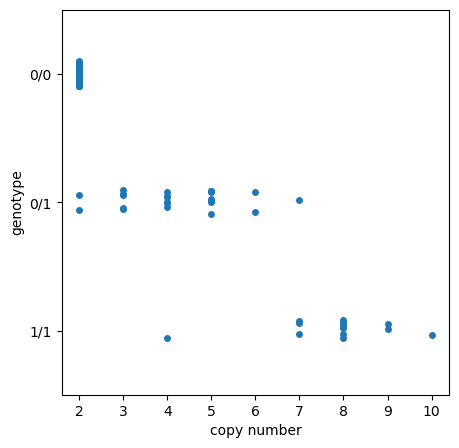

In [22]:
def genotype_by_copy_number(contig, position, sample_sets):
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    geno = ag3.snp_genotypes(region=f"{contig}:{position}-{position+1}", sample_sets=sample_sets).compute()
    geno = geno[0]
    geno = np.apply_along_axis(arr=geno, func1d=lambda x: "/".join(map(str, x)), axis=1)

    ds_cnv = ag3.gene_cnv(region=f"{contig}:{position}-{position+1}", sample_sets=sample_sets)
    cnv_cn = ds_cnv['CN_mode'].compute().values[0]

    fig, ax = plt.subplots(1,1, figsize=[5,5])
    sns.stripplot(x=cnv_cn, y=geno, order = ['0/0','0/1','1/1'], ax=ax)
    plt.ylabel("genotype")
    plt.xlabel("copy number")
    plt.show()


genotype_by_copy_number(contig="2R", position=3492074, sample_sets="AG1000G-GH")

## What then now?

Here we have demonstrated techniques that allow us to compare the frequency of SNPs and CNVs from the Ag3.0 data release together. However, the real power of these techniques to advance malaria control will come when they are applied to more recent data releases containing samples collected recently as spatial or temporal transects. With these data, associated SNPs and CNVs can be tracked together over space and time.

These analyses will need to be used in concert with others which are able to detect new loci under selection (see [module 2 in this workshop](https://anopheles-genomic-surveillance.github.io/workshop-7/module-2-gene-flow.html)). This is more relevant than ever with the large uptake in Actellic use (an organophosphate) for indoor residual spraying, as the established OP resistance mechanisms are likely to be supplemented by new loci and markers as mosquitoes evolve stronger resistance through greater exposure. 


## Practical exercise - _Gste2_

### English 

The _Gste2_ gene encodes an epsilon-class glutathione-S-transferase. It was initially studied in _An. gambiae_ because its ortholog in the dengue and yellow fever vector _Aedes aegypti_ has been linked to DDT resistance through increased gene expression.

One study looking at amino acid substitions in _An. gambiae_ _Gste2_ found two mutations that in some cohorts were associated with insecticide resistance ([Lucas et al. 2019](https://www.nature.com/articles/s41598-019-49892-6)). L119V was associated with permethrin (a type of pyrethroid) resistance and I114T was associated with both permethrin and DDT. Previously, [Mitchell et al. (2014)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3968025/) found that *Gste2* I114T conferred DDT resistance in *An. gambiae* and *An. coluzzii*. 

The I114T mutation was also found to be associated with a CNV amplification that appeared to have fixed heterozygosity, much like with _Ace1_. The gene had duplicated, so that a wild-type gene and a I114T resistance mutation carrying gene were found on the same haplotype.

To further complicate the insecticide resistance story of _Gste2_ (and bring it into the scope of this module!) it has also been shown that overexpression of _Gste2_ is associated with OP resistance ([Adolfi et al. 2019](https://www.pnas.org/doi/10.1073/pnas.1914633116)). 
   
So, for this module's practical excercise, I would like you run a case study on amino acid and CNV frequencies in _Gste2_, using the same analytical approach as we used for _Ace1_ and the _An. coluzzii_ samples from Ag3.0.

    


**1. Investigate amino acid frequencies in _Gste2_.**  _HINT: transcript="AGAP009194-RA"_.
 - Why might the amino acid positional numbering go from high to low (opposite to _Ace1_)?
  

**2. Examine CNVs in this region.** _HINT: region="3R:28,597,652-28,598,640"_
 - Plot a `cnv_hmm_heatmap` for the region - are there CNVs here?
 - Investigate gene cnv frequencies for _Gste2_.
  

**3. Concatenate the amino acid frequency and gene cnv frequency DataFrames.**
  

**4. Visualise the concatenated DataFrame as heatmap.** _HINT: don't forget to subset the DataFrame columns first._
 - Are there any clear patterns of association between SNP and CNV markers of insecticide resistance, like we found for _Ace1_? Why might this be the case?
  

**5. If you would like to dig deeper into these analyses and their interpretations...**
 - As an optional exercise, the _Ace1_ and _Gste2_ case studies could be repeated but looking at _An. gambiae_ instead of _An. coluzzii_. _HINT: remember the range of_ An. gambiae _is larger than_ coluzzii.
 
 



### Français

_Gste2_ code pour une glutathion-S-transférase de classe epsilon. Il a été initialement étudié chez _An. gambiae_ car son orthologue chez le vecteur de la dengue et de la fièvre jaune _Aedes aegypti_, a été connecté à une résistance au DDT par augmentation de l'expression génique.

Une étude observant les substitutions d'acides aminés chez _An. gambiae_ pour _Gste2_ a trouvé deux mutations qui pour certaines cohortes étaient associées à une résistance aux insecticide ([Lucas et al. 2019](https://www.nature.com/articles/s41598-019-49892-6)). L119V était associée à une résistance à la perméthrine (un type de pyrethrinoïde) et I114T était associée à une résistance à la fois à la perméthrine et au DDT. Précédemment, [Mitchell et al. 2014](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3968025/) a montré que _Gste2_ I114T confère une résistance au DDT chez les _An. gambiae_ et les _An. coluzzii_.

La mutation I114T était aussi associée à une amplification des CNVs, qui semble avoir une hétérozygotie fixée, de manière très similaire à _Ace1_. Ce gène était dupliquée, de telle sorte qu'un gène contenant l'allèle sauvage et un gène contenant I114T, l'allèle de résistance se trouvaient dans le même haplotype.

Pour compliquer encore l'histoire de la résistance aux insecticides liée à _Gste2_ (et la rapprocher du sujet de ce module!), il a aussi été montré que la surexpression de _Gste2_ est associée à une résistance aux OPs. ([Adolfi et al. 2019](https://www.pnas.org/doi/10.1073/pnas.1914633116)). 

Donc, pour l'exercice pratique de ce module, je voudrais que vous étudiez les fréquences des substitutions d'acides aminés et ses CNVs pour _Gste2_ en utilisant la même approche analytique que nous avons utilisée pour _Ace1_ et les échantillons de _coluzzii_ d'Ag3.0.`


**1. Etudier les fréquences des acides aminés pour _Gste2_.**   _Indice: transcript="AGAP009194-RA"_.
 - Pourquoi est-ce que la numérotation des positions des acides aminés set décroissante (contrairement au cas d'_Ace1_)?
  

**2. Examiner les CNVs dans cette région.** _Indice: region="3R:28,597,652-28,598,640"_
 - Afficher le diagramme `cnv_hmm_heatmap` pour cette région - quels CNVs sont présents?
 - Etudier les fréquences des CNVs pour  _Gste2_.
  

**3. Concaténer les DataFrames des fréquences des acides aminés et des fréquences des CNVs.**
  

**4. Visualiser le DataFrame obtenu par concaténation sous forme de heatmap.** _Indice: ne pas oublier de sélectionner les colonnes avant._
 - Y a-t-il des motifs clairs d'association enter les SNPs et les CNVs associés à la résistance aux insecticides, comme observé pour _Ace1_? Pourquoi cela?
  

**5. Si vous souhaitez explorer ces analyses et leurs interprétations plus en profondeur...**
 - En tant qu'exercice optionel, les études de cas pour _Ace1_ et _Gste2_ peuvent être répétées pour _An. gambiae_ au lieu d' _An. coluzzii_. _Indice: se souvenir que la distribution des_ An. gambiae _couvre une région plus vaste que celle des_ coluzzii.

## Well done!

In this module we have learnt how to:  
  * Understand mechanisms and markers of organophosphate resistance.  
  * Run amino acid frequency and CNV gene frequency analyses.  
  * Combine and interpret SNP and CNV frequency data.


## Exercises

### English

Open this notebook in Google Colab and run it for yourself from top to bottom. As you run through the notebook, cell by cell, think about what each cell is doing, and try the practical exercises along the way.

Have go at the practical exercises, but please don’t worry if you don’t have time to do them all during the practical session, and please ask the teaching assistants for help if you are stuck.

Hint: To open the notebook in Google Colab, click the rocket icon at the top of the page, then select “Colab” from the drop-down menu.

### Français

Ouvrir ce notebook dans Google Colab et l’exécuter vous-même du début à la fin. Pendant que vous exécutez le notebook, cellule par cellule, pensez à ce que chaque cellule fait et essayez de faire les exercices quand vous les rencontrez.

Essayez de faire les exercices mais ne vous inquiétez pas si vous n’avez pas le temps de tout faire pendant la séance appliquée et n’hésitez pas à demander aux enseignants assistants si vous avez besoin d’aide parce que vous êtes bloqués.

Indice: Pour ouvrir le notebook dans Google Colab, cliquer sur l’icône de fusée au sommet de cette page puis choisissez “Colab” dans le menu déroulant.